In [1]:
import tensorflow as tf
import gym
import random
import numpy as np
import gym
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from collections import deque
import numpy as np
import random
import datetime

In [43]:

REPLAY_MEMORY_SIZE = 50_000
MIN_REPLAY_MEMORY_SIZE = 1_000
MODEL_NAME = 'DENSE'
ENV_OBSERVATION_SPACE = (8,1)
ACTION_SPACE = 4

In [2]:
env = gym.make('LunarLander-v2')

In [44]:
model = Sequential()
model.add(tf.keras.layers.Dense(units=28, activation='tanh', input_shape=ENV_OBSERVATION_SPACE))
model.add(tf.keras.layers.Dense(units=56, activation='tanh'))
model.add(tf.keras.layers.Dense(units=28, activation='tanh'))
model.add(tf.keras.layers.Dense(units=ACTION_SPACE))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, None, 8, 28)       56        
_________________________________________________________________
dense_11 (Dense)             (None, None, 8, 56)       1624      
_________________________________________________________________
dense_12 (Dense)             (None, None, 8, 28)       1596      
_________________________________________________________________
dense_13 (Dense)             (None, None, 8, 4)        116       
Total params: 3,392
Trainable params: 3,392
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.predict((np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]).reshape(1,8,1)))[0]

array([[ 0.13537371,  0.04993856,  0.01828731, -0.11634445],
       [ 0.13537371,  0.04993856,  0.01828731, -0.11634445],
       [ 0.13537371,  0.04993856,  0.01828731, -0.11634445],
       [ 0.13537371,  0.04993856,  0.01828731, -0.11634445],
       [ 0.13537371,  0.04993856,  0.01828731, -0.11634445],
       [ 0.13537371,  0.04993856,  0.01828731, -0.11634445],
       [ 0.13537371,  0.04993856,  0.01828731, -0.11634445],
       [ 0.13537371,  0.04993856,  0.01828731, -0.11634445]],
      dtype=float32)

In [48]:
tf.keras.callbacks.TensorBoard()

In [54]:
env.step(0)

(array([ 0.00731525,  1.3922826 ,  0.12332779, -0.20456259, -0.00831204,
        -0.02761588,  0.        ,  0.        ], dtype=float32),
 -1.9186847219120011,
 False,
 {})

In [55]:
tf.reshape((64, -1, 8))

TypeError: reshape() missing 1 required positional argument: 'shape'

In [60]:
with open('rewards.txt', 'a') as file:
    file.write('1')
    file.write(',-500')

In [30]:
env.action_space.sample()

1

In [33]:
test = [[x for x in range(20)], [x for x in range(20)]]

In [37]:
tf.data.Dataset.from_generator(lambda: test, tf.int32, output_shapes=[None])

<DatasetV1Adapter shapes: (None,), types: tf.int32>

In [38]:
optimizer = tf.keras.optimizers.Adam()

In [41]:
model = tf.keras.Sequential()


In [43]:
model.add(tf.keras.layers.Dense(units=28, activation='relu'))

In [60]:
np.random.random()

0.08479633354424876

In [54]:
t

0.010996750291397347

In [50]:
20000*20 / 3600 / 24


4.62962962962963

In [61]:
from tensorflow.keras.models import load_model

In [62]:
import matplotlib.pyplot as plt

In [66]:
x = [i for i in range(10)]
y1 = [np.random.random() for i in range(10)]
y2 = [np.random.random()*1000 for i in range(10)]

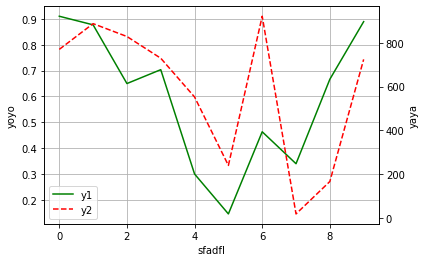

In [74]:
fig, axes = plt.subplots()
ax = plt.subplot()
yaya = ax.plot(x, y1, label='y1', color='green')
ax2 = ax.twinx()
yoyo = ax2.plot(x, y2, label='y2', color='red', ls ='--')

lns = yaya + yoyo
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel('sfadfl')
ax.set_ylabel('yoyo')
ax2.set_ylabel('yaya')

plt.show()

In [75]:
import os
tot_m, used_m, free_m = map(int, os.popen('free -t -m').readlines()[-1].split()[1:])

In [76]:
tot_m

48361

In [77]:
used_m

3722

In [78]:
free_m

37210

In [79]:
1e-3

0.001